In [1]:
import pandas as pd
import numpy as np

In [2]:
owid_covid19 = pd.read_csv('./dataset/OWID/owid-covid-data.csv')
owid_covid19.head(2) 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [31]:
owid_covid19_mexico=owid_covid19.query('location=="Mexico"')[160:]
day_num=list(range(1,owid_covid19_mexico.shape[0]+1))
owid_covid19_mexico['day_num']=day_num
owid_covid19_mexico.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,day_num
23617,MEX,North America,Mexico,2020-06-08,117103.0,3484.0,3777.000,13699.0,188.0,538.429,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,1
23618,MEX,North America,Mexico,2020-06-09,120102.0,2999.0,3809.571,14053.0,354.0,555.143,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,2
23619,MEX,North America,Mexico,2020-06-10,124301.0,4199.0,3853.571,14649.0,596.0,573.143,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,3
23620,MEX,North America,Mexico,2020-06-11,129184.0,4883.0,3992.286,15357.0,708.0,518.429,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,4
23621,MEX,North America,Mexico,2020-06-12,133974.0,4790.0,4042.000,15944.0,587.0,485.571,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,5
23622,MEX,North America,Mexico,2020-06-13,139196.0,5222.0,4167.143,16448.0,504.0,468.286,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,6
23623,MEX,North America,Mexico,2020-06-14,142690.0,3494.0,4153.000,16872.0,424.0,480.143,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,7
23624,MEX,North America,Mexico,2020-06-15,146837.0,4147.0,4247.714,17141.0,269.0,491.714,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,8
23625,MEX,North America,Mexico,2020-06-16,150264.0,3427.0,4308.857,17580.0,439.0,503.857,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,9
23626,MEX,North America,Mexico,2020-06-17,154863.0,4599.0,4366.000,18310.0,730.0,523.000,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,10


In [24]:
def logistic_function(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b
def fit_logistic(all_data,train_lim, target):
    data_cp = all_data.copy()
    y = data_cp[:train_lim][target].astype(np.int32)
    x = list(range(0, len(y)))

    # Initial guess
    p0 = [0,1,1,0]

    (a_, b_, c_, d_), cov = optimize.curve_fit(logistic_function, x, y, bounds=(0, [500000., 10., 1000., 1000., ]), p0=p0, maxfev=10**9)
    y_fit = logistic_function(x, a_, b_, c_, d_)
    
    return x, y, y_fit, (a_, b_, c_, d_), cov
def plot_logistic(x, y, y_fit,country_name,target):
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(x, y, 'o')
    ax.plot(x, y_fit, '-')
    ax.set_xlabel("Day count (starting on 2020-06-08)")
    ax.set_ylabel(target)
    ax.set_title("Fit to logistic regression for "+ country_name)
def plot_logistic_country(all_data, train, valid_num, country_name,target, x, a_, b_, c_, d_):
    forecast = logistic_function(list(range(len(x)+60)), a_, b_, c_, d_)
    df_train = train[target][:]
    df_fcst = forecast[:len(df_train)]
    dates = list(range(0,len(df_train)))
    
    # Plot results
    fig, (ax1) = plt.subplots(1, 1, figsize=(6,4))
    ax1.plot(dates, df_fcst)
    ax1.plot(dates, df_train)
    ax1.axvline(len(df_train)-valid_num-1, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.set_title("Actual new cases vs predictions based on Logistic curve for "+country_name)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count starting on 2020-06-08")
    ax1.set_ylabel("ConfirmedCases")

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
from scipy import integrate, optimize

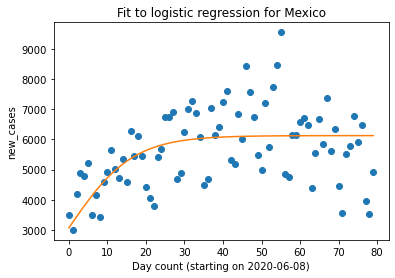

In [43]:
# Fit country to logistic curve
train_lim = 80
valid_lim = 119 # needs to be changed as more days of training data are included
#test_lim = 112
valid_num=valid_lim-train_lim 
x, y, y_fit, (a_, b_, c_, d_), cov = fit_logistic(owid_covid19_mexico, train_lim, 'new_cases')
plot_logistic(x, y, y_fit,'Mexico','new_cases')

In [40]:
train=owid_covid19_mexico[:train_lim]

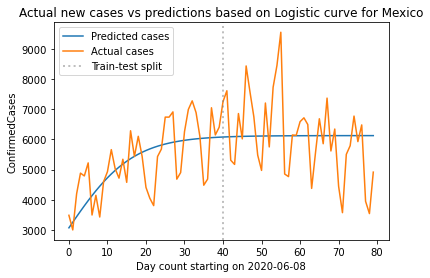

In [44]:
plot_logistic_country(owid_covid19_mexico, train, valid_num, 'Mexico','new_cases', x, a_, b_, c_, d_)